In [213]:
#!pip install scikit-plot

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [215]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [216]:
df_train = pd.read_csv('train_log.csv')

In [217]:
df_train.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147
1,Looping,"(5, 6]",1982,0,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683


In [218]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movie',
    'tvMovie': 'Movie',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df_train['titleType'] = df_train['titleType'].map(category_mapping)

In [219]:
# X = df_train.values
# y = np.array(df_train['titleType'])

In [220]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']

## Partitioning

In [221]:
df_train.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,numRegions,ratingMean,ReviewsTotal
0,1995,40,0.000000,6.659294,0.693147,0.000000,21,TV Series,0.000000,1,7.5,0.693147
1,1982,0,0.000000,2.484907,0.693147,0.000000,1,Videogame,0.000000,1,5.5,0.000000
2,1992,92,0.000000,3.663562,0.693147,0.000000,24,Movie,0.000000,1,5.5,0.693147
3,2021,53,0.000000,2.772589,3.135494,0.000000,56,TV Series,0.000000,1,5.5,0.000000
4,2020,80,0.693147,9.662625,5.852202,1.098612,47,TV Series,0.693147,32,7.5,6.124683


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X = df_train.drop(columns=['titleType'])
y = df_train['titleType']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.3855573  0.15510204 0.38825746 0.00929356 0.04803768 0.01375196]
[0.3855573  0.15510204 0.38827839 0.0093145  0.04803768 0.0137101 ]
[0.3855573  0.15510204 0.38822606 0.00926217 0.04803768 0.01381476]


### Normalization

In [225]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [226]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Nayve Bayesian

In [227]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [228]:
clf = GaussianNB()

In [229]:
%%time
clf.fit(X_train_norm, y_train)

CPU times: total: 15.6 ms
Wall time: 7.58 ms


GaussianNB()

In [230]:
y_pred = clf.predict(X_test_norm)
y_pred

array(['Video', 'Video', 'TV Series', ..., 'TV Series', 'Movie',
       'TV Series'], dtype='<U10')

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Movie       0.86      0.53      0.66      2456
      Shorts       0.75      0.84      0.79       988
   TV Series       0.73      0.54      0.62      2473
  TV Special       0.08      0.10      0.09        59
       Video       0.11      0.67      0.19       306
   Videogame       0.99      1.00      0.99        88

    accuracy                           0.59      6370
   macro avg       0.59      0.61      0.56      6370
weighted avg       0.75      0.59      0.64      6370



In [232]:
clf.predict_proba(X_test_norm)

array([[1.19690648e-03, 2.60958294e-02, 2.29721479e-01, 3.10557806e-02,
        7.11930004e-01, 0.00000000e+00],
       [1.27652392e-03, 2.45865114e-22, 4.03736133e-02, 2.49751555e-02,
        9.33374707e-01, 0.00000000e+00],
       [1.07215737e-01, 5.48459065e-17, 6.20126096e-01, 8.51464142e-02,
        1.87511753e-01, 0.00000000e+00],
       ...,
       [1.35913030e-02, 3.82773816e-16, 9.86238254e-01, 1.68754129e-04,
        1.68929641e-06, 0.00000000e+00],
       [9.99997050e-01, 1.49688410e-45, 2.54041392e-20, 2.95005417e-06,
        2.39029383e-49, 0.00000000e+00],
       [4.66933247e-03, 6.62000745e-12, 9.81716500e-01, 9.32860921e-03,
        4.28555782e-03, 0.00000000e+00]])

In [233]:
# # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# plot_roc(y_test, clf.predict_proba(X_test))
# plt.show()
# print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

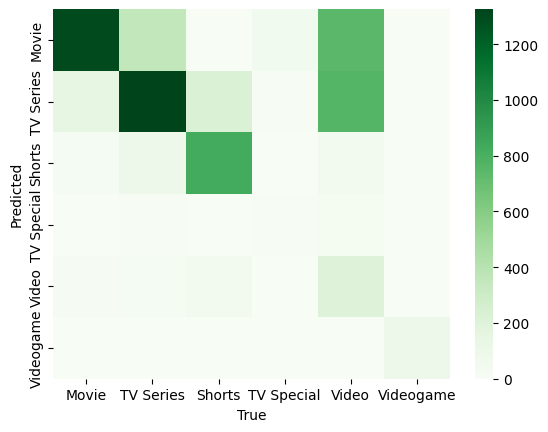

In [234]:
class_names = ['Movie', 'TV Series', 'Shorts', 'TV Special', 'Video', 'Videogame']

cf = confusion_matrix(y_test, y_pred, labels=class_names)

sns.heatmap(cf, annot=False, cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### K-fold cross validation

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Supponiamo di avere X e y come feature e target
clf = GaussianNB()

# Esegui la cross-validation k-fold con k=5
scores = cross_val_score(clf, X, y, cv=100)

print("Cross-Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())

Cross-Validation Scores:  [0.59375    0.625      0.58125    0.6        0.6        0.55625
 0.58125    0.55       0.6        0.55625    0.5375     0.56875
 0.63125    0.61875    0.63125    0.54375    0.61875    0.64375
 0.55       0.625      0.6        0.6125     0.625      0.59375
 0.56875    0.63522013 0.62893082 0.59119497 0.57861635 0.57232704
 0.58490566 0.50314465 0.57861635 0.55345912 0.59748428 0.63522013
 0.60377358 0.52201258 0.52830189 0.56603774 0.53459119 0.53459119
 0.60377358 0.52830189 0.61006289 0.55345912 0.5408805  0.65408805
 0.61006289 0.61006289 0.56603774 0.62264151 0.55974843 0.52830189
 0.57232704 0.59748428 0.59119497 0.57861635 0.64779874 0.57861635
 0.55974843 0.52201258 0.66037736 0.59119497 0.6163522  0.64779874
 0.59119497 0.52201258 0.57861635 0.60377358 0.52201258 0.57232704
 0.65408805 0.63522013 0.58490566 0.57861635 0.58490566 0.57861635
 0.59119497 0.57861635 0.57861635 0.62893082 0.57861635 0.57861635
 0.62893082 0.6163522  0.55974843 0.61006289 0.6

### Evaluation

In [236]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supponiamo di avere X e y come feature e target del dataset di addestramento
X_train = X
y_train = y

# Caricare il dataset di test
df_test = pd.read_csv('test_log.csv')

In [237]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movie',
    'tvMovie': 'Movie',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df_test['titleType'] = df_test['titleType'].map(category_mapping)

In [238]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']

In [239]:
X_test = df_test.drop('titleType', axis=1)
y_test = df_test['titleType']

norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Inizializzare e addestrare il classificatore Naive Bayes sull'intero dataset di addestramento
clf = GaussianNB()
clf.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = clf.predict(X_test)

# Valutare la performance del modello sui dati di test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Report di classificazione
report = classification_report(y_test, y_pred)
print(report)

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.5804024826029716
              precision    recall  f1-score   support

       Movie       0.86      0.53      0.66      2092
      Shorts       0.69      0.86      0.76       770
   TV Series       0.74      0.51      0.60      2084
  TV Special       0.09      0.11      0.10        46
       Video       0.11      0.68      0.19       242
   Videogame       1.00      0.95      0.98        83

    accuracy                           0.58      5317
   macro avg       0.58      0.61      0.55      5317
weighted avg       0.75      0.58      0.63      5317

[[1114    7  305   31  635    0]
 [  26  660   56    0   28    0]
 [ 116  254 1063   13  638    0]
 [   9    1    5    5   26    0]
 [  23   38   12    4  165    0]
 [   2    0    2    0    0   79]]


#### Categorical

In [240]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [241]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Caricare il dataset di addestramento
df_train = pd.read_csv('train_log.csv')

In [242]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movie',
    'tvMovie': 'Movie',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df_train['titleType'] = df_train['titleType'].map(category_mapping)

# Convertire countryOfOrigin in stringhe
df_train['countryOfOrigin'] = df_train['countryOfOrigin'].apply(lambda x: str(x))

In [243]:
# Codificare le variabili categoriche
label_encoders = {}
categorical_columns = ['rating', 'countryOfOrigin', 'genres', 'canHaveEpisodes', 'isAdult']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column].astype(str))

# Codificare la variabile target
label_encoders['titleType'] = LabelEncoder()
df_train['titleType'] = label_encoders['titleType'].fit_transform(df_train['titleType'])

In [244]:
# Definire le caratteristiche e la variabile target
X = df_train[categorical_columns]
y = df_train['titleType']

# Dividere i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Inizializzare e addestrare il classificatore Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [245]:
# Fare previsioni sul set di test
y_pred = model.predict(X_test)

# Calcolare l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Report di classificazione
report = classification_report(y_test, y_pred, target_names=label_encoders['titleType'].classes_)
print(report)

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 0.8114599686028258
              precision    recall  f1-score   support

       Movie       0.82      0.81      0.82      2453
      Shorts       0.88      0.89      0.89       994
   TV Series       0.79      0.88      0.83      2468
  TV Special       0.00      0.00      0.00        63
       Video       0.67      0.36      0.47       307
   Videogame       0.50      0.01      0.02        85

    accuracy                           0.81      6370
   macro avg       0.61      0.49      0.50      6370
weighted avg       0.80      0.81      0.80      6370

[[1990   26  390    0   47    0]
 [  45  886   63    0    0    0]
 [ 261   20 2180    0    6    1]
 [  17    1   43    0    2    0]
 [  69   74   52    0  112    0]
 [  38    1   45    0    0    1]]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

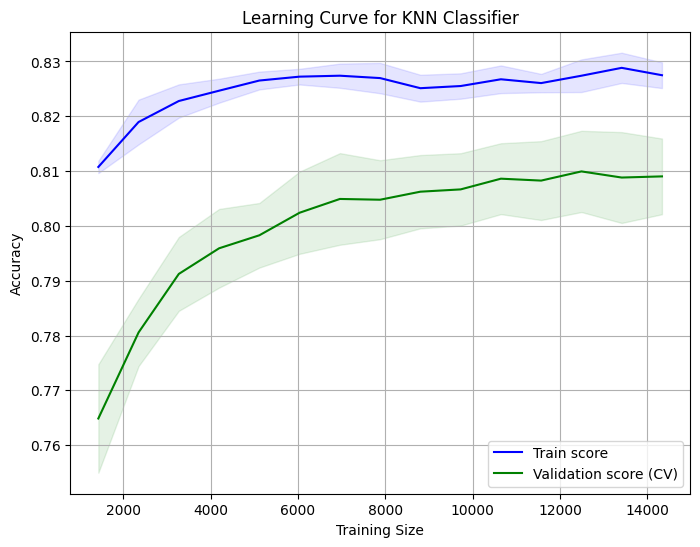

In [246]:
# Calcola la learning curve con cross-validation
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 15))

# Rimuovere i valori NaN dai punteggi dei test
train_scores = [score[~np.isnan(score)] for score in train_scores]
test_scores = [score[~np.isnan(score)] for score in test_scores]

# Calcola le medie e le deviazioni standard per train e test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Traccia la learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train score", color='blue')
plt.plot(train_sizes, test_mean, label="Validation score (CV)", color='green')

# Aggiungi bande di deviazione standard
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

# Etichette e titolo
plt.title("Learning Curve for KNN Classifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)

# Mostra il grafico
plt.show()

### TEST

In [247]:
# Caricare il dataset di test separato
df_test = pd.read_csv('test_log.csv')

model.fit(X, y)

# Applicare le stesse trasformazioni al dataset di test
df_test['titleType'] = df_test['titleType'].replace(category_mapping)
# df_test['awardWins_bol'] = df_test['awardWins'] > 0
df_test['countryOfOrigin'] = df_test['countryOfOrigin'].apply(lambda x: str(x))

# Gestire le categorie sconosciute nei dati di test
for column in ['rating', 'countryOfOrigin', 'genres']:
    df_test[column] = df_test[column].apply(lambda x: x if x in label_encoders[column].classes_ else label_encoders[column].classes_[0])

# Codificare le variabili categoriche nel dataset di test
for column in categorical_columns:
    df_test[column] = label_encoders[column].transform(df_test[column].astype(str))

df_test['titleType'] = label_encoders['titleType'].transform(df_test['titleType'])

# Definire le caratteristiche e la variabile target per il dataset di test
X_test_finale = df_test[categorical_columns]
y_test_finale = df_test['titleType']

# Fare previsioni sul dataset di test separato
y_pred_finale = model.predict(X_test_finale)

# Calcolare l'accuratezza sul dataset di test separato
accuracy_finale = accuracy_score(y_test_finale, y_pred_finale)
print(f"Final Test Accuracy: {accuracy_finale}")

# Report di classificazione sul dataset di test separato
report_finale = classification_report(y_test_finale, y_pred_finale, target_names=label_encoders['titleType'].classes_)
print(report_finale)

# Matrice di confusione sul dataset di test separato
conf_matrix_finale = confusion_matrix(y_test_finale, y_pred_finale)
print(conf_matrix_finale)

Final Test Accuracy: 0.8188828286627797
              precision    recall  f1-score   support

       Movie       0.83      0.81      0.82      2092
      Shorts       0.88      0.92      0.90       770
   TV Series       0.80      0.89      0.84      2084
  TV Special       0.00      0.00      0.00        46
       Video       0.65      0.36      0.46       242
   Videogame       0.71      0.06      0.11        83

    accuracy                           0.82      5317
   macro avg       0.65      0.51      0.52      5317
weighted avg       0.81      0.82      0.81      5317

[[1704   16  327    1   43    1]
 [  27  705   35    0    2    1]
 [ 207   22 1854    0    1    0]
 [  16    1   29    0    0    0]
 [  60   56   40    0   86    0]
 [  33    2   43    0    0    5]]


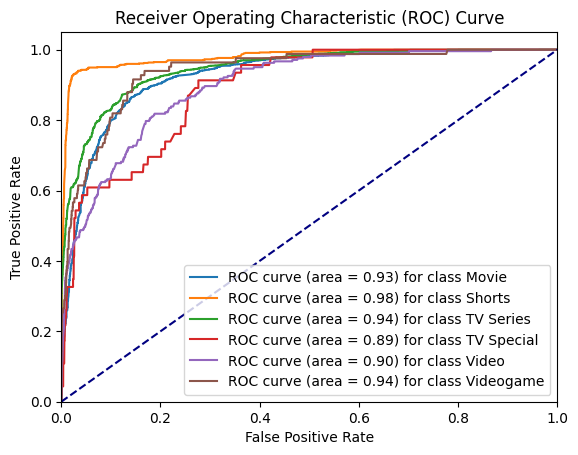

In [248]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calcolare le probabilità previste per il set di test
y_prob = model.predict_proba(X_test_finale)

# Calcolare la ROC curve e l'AUC per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoders['titleType'].classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_finale, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracciare tutte le ROC curve
plt.figure()
for i in range(len(label_encoders['titleType'].classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {label_encoders["titleType"].classes_[i]}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Rating

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [250]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [251]:
df_train = pd.read_csv('train_log.csv')

In [252]:
del df_train['originalTitle']
del df_train['titleType']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']

In [253]:
X = df_train.drop(columns=['rating'])
y = df_train['rating']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[2.51177394e-04 3.70486656e-03 8.85400314e-03 2.72527473e-02
 6.80062794e-02 1.69167975e-01 2.78116170e-01 2.96200942e-01
 1.26907378e-01 2.15384615e-02]
[2.09314495e-04 3.66300366e-03 8.89586604e-03 2.72108844e-02
 6.80272109e-02 1.69126112e-01 2.78178964e-01 2.96180010e-01
 1.26949241e-01 2.15593930e-02]
[0.00031397 0.00376766 0.00879121 0.02731554 0.06797488 0.16923077
 0.27802198 0.29623234 0.12684458 0.02150706]


## Nayve Bayesian

In [255]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [256]:
clf = GaussianNB()

In [257]:
%%time
clf.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 9.47 ms


GaussianNB()

In [258]:
y_pred = clf.predict(X_test)
y_pred

array(['(7, 8]', '(8, 9]', '(6, 7]', ..., '(5, 6]', '(6, 7]', '(8, 9]'],
      dtype='<U7')

In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      (0, 1]       1.00      1.00      1.00         2
      (1, 2]       1.00      1.00      1.00        24
      (2, 3]       1.00      1.00      1.00        56
      (3, 4]       1.00      1.00      1.00       174
      (4, 5]       1.00      1.00      1.00       433
      (5, 6]       1.00      1.00      1.00      1078
      (6, 7]       1.00      1.00      1.00      1771
      (7, 8]       1.00      1.00      1.00      1887
      (8, 9]       1.00      1.00      1.00       808
     (9, 10]       1.00      1.00      1.00       137

    accuracy                           1.00      6370
   macro avg       1.00      1.00      1.00      6370
weighted avg       1.00      1.00      1.00      6370



In [260]:
clf.predict_proba(X_test)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Evaluation

In [261]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_train = pd.read_csv('train_log.csv')

# # Supponiamo di avere X e y come feature e target del dataset di addestramento
# X_train = X
# y_train = y

# Caricare il dataset di test
df_test = pd.read_csv('test_log.csv')

In [262]:
del df_train['originalTitle']
del df_train['titleType']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']

In [263]:
del df_test['originalTitle']
del df_test['titleType']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']

In [264]:
X_train = df_train.drop(columns=['rating'])
y_train = df_train['rating']

In [265]:
X_test = df_test.drop(columns=['rating'])
y_test = df_test['rating']

# Inizializzare e addestrare il classificatore Naive Bayes sull'intero dataset di addestramento
clf = GaussianNB()
clf.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = clf.predict(X_test)
print(y_pred)
print(y_train)
print(y_test)

# Valutare la performance del modello sui dati di test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Report di classificazione
report = classification_report(y_test, y_pred)
print(report)

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

['(9, 10]' '(4, 5]' '(8, 9]' ... '(3, 4]' '(6, 7]' '(4, 5]']
0         (7, 8]
1         (5, 6]
2         (5, 6]
3         (5, 6]
4         (7, 8]
          ...   
15920     (5, 6]
15921     (4, 5]
15922     (5, 6]
15923     (3, 4]
15924    (9, 10]
Name: rating, Length: 15925, dtype: object
0       (9, 10]
1        (4, 5]
2        (8, 9]
3        (6, 7]
4        (5, 6]
         ...   
5312     (7, 8]
5313     (6, 7]
5314     (3, 4]
5315     (6, 7]
5316     (4, 5]
Name: rating, Length: 5317, dtype: object
Accuracy: 1.0
              precision    recall  f1-score   support

      (0, 1]       1.00      1.00      1.00         1
      (1, 2]       1.00      1.00      1.00        19
      (2, 3]       1.00      1.00      1.00        49
      (3, 4]       1.00      1.00      1.00       145
      (4, 5]       1.00      1.00      1.00       366
      (5, 6]       1.00      1.00      1.00       901
      (6, 7]       1.00      1.00      1.00      1483
      (7, 8]       1.00      1.00      1.00 